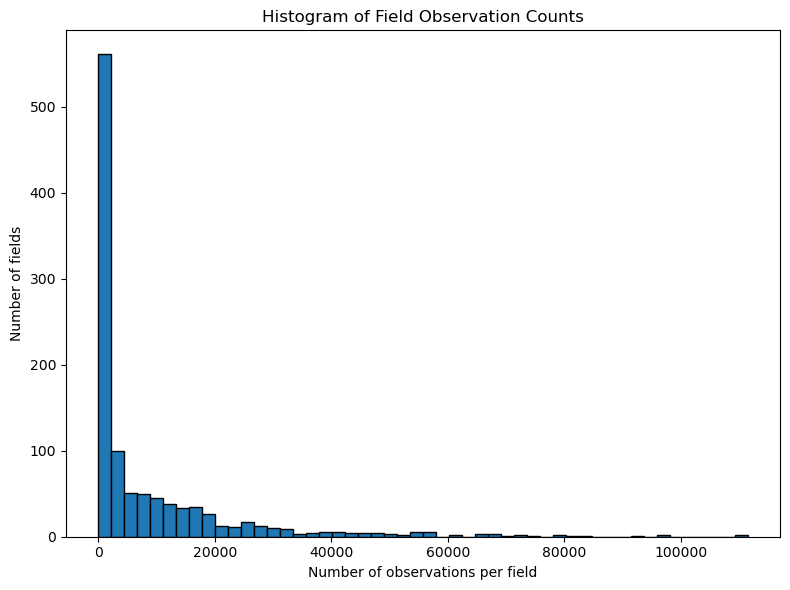

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 1. Path to your top‐level directory of field folders
main_directory = '/home/jovyan/research/Current/Field_Numbers'

# 2. This dict will map each field number → its count of observations
field_counts = {}

# 3. Loop over every entry in the main directory
for field in os.listdir(main_directory):
    subdir = os.path.join(main_directory, field)
    # Skip anything that isn't a directory
    if not os.path.isdir(subdir):
        continue

    # Construct the expected path to observation.csv
    csv_path = os.path.join(subdir, 'observation.csv')
    # If the CSV exists, read it and count rows
    if os.path.isfile(csv_path):
        df = pd.read_csv(csv_path)
        field_counts[field] = len(df)
    else:
        # If there's no CSV, let us know (optional)
        print(f"Warning: no observation.csv in {subdir}")

# 4. Extract all counts into a list for plotting
counts = list(field_counts.values())

# 5. Plot a histogram of how many observations each field has
plt.figure(figsize=(8,6))
plt.hist(counts, bins=50, edgecolor='black')
plt.xlabel('Number of observations per field')
plt.ylabel('Number of fields')
plt.title('Histogram of Field Observation Counts')
plt.tight_layout()

#plt.xlim(0,20000)
plt.show()


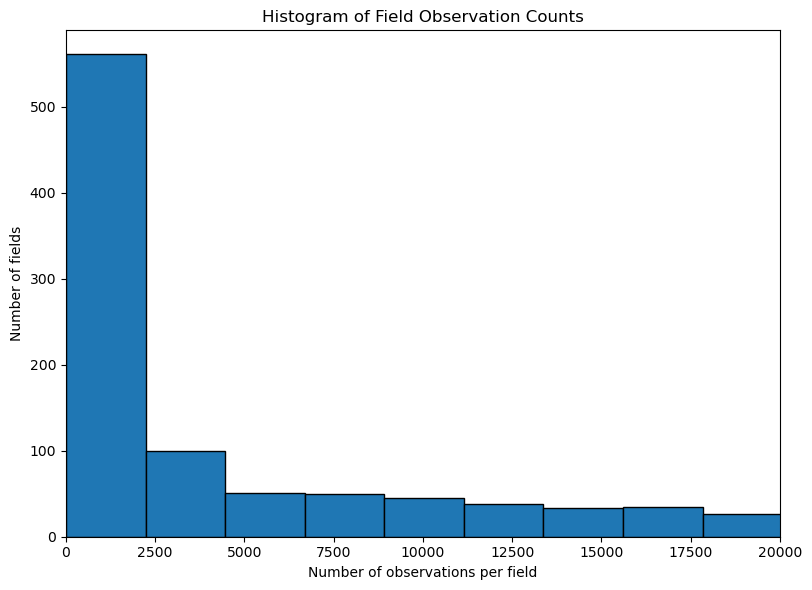

In [3]:
plt.figure(figsize=(8,6))
plt.hist(counts, bins=50, edgecolor='black')
plt.xlabel('Number of observations per field')
plt.ylabel('Number of fields')
plt.title('Histogram of Field Observation Counts')
plt.tight_layout()
plt.xlim(0,20000)

plt.show()

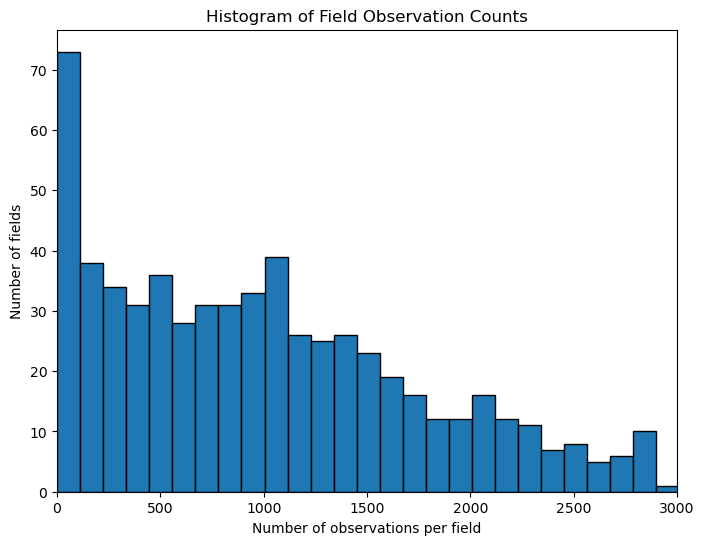

In [22]:
plt.figure(figsize=(8,6))
plt.hist(counts, bins=1000, edgecolor='black')
plt.xlabel('Number of observations per field')
plt.ylabel('Number of fields')
plt.title('Histogram of Field Observation Counts')
#plt.tight_layout()
plt.xlim(0,3000)

plt.show()

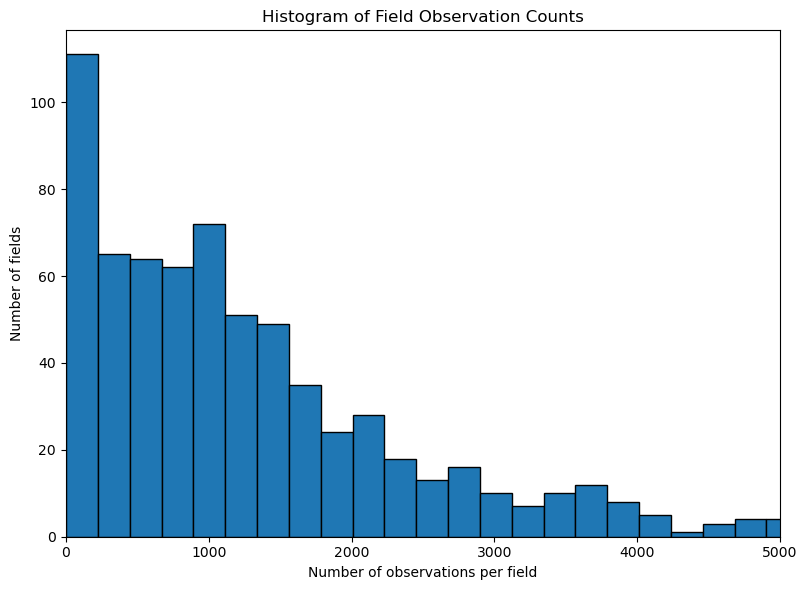

In [6]:
plt.figure(figsize=(8,6))
plt.hist(counts, bins=500, edgecolor='black')
plt.xlabel('Number of observations per field')
plt.ylabel('Number of fields')
plt.title('Histogram of Field Observation Counts')
plt.tight_layout()
plt.xlim(0,5000)

plt.show()

In [8]:
import os
import pandas as pd
path = '/home/jovyan/research/Current/Field_Numbers/1278'

# 1. Build the path to the CSV in that folder
csv_path = os.path.join(path, 'observation.csv')

# 2. Read it in and count the rows
df = pd.read_csv(csv_path)
obs_count = len(df)

# 3. Print the result
print(f"Field {os.path.basename(path)} has {obs_count} observations.")


Field 1278 has 8 observations.


In [9]:
counts_series = pd.Series(counts)

# 4. Compute summary statistics
mean_obs   = counts_series.mean()       # average number of observations
median_obs = counts_series.median()     # middle value when sorted
mode_obs   = counts_series.mode().iloc[0]  # most common count
min_obs    = counts_series.min()        # smallest count
max_obs    = counts_series.max()        # largest count
range_obs  = max_obs - min_obs          # difference between max and min

# 5. Print out the results
print(f"Across {len(counts)} fields:")
print(f"  • Mean observations per field:   {mean_obs:.2f}")
print(f"  • Median observations per field: {median_obs:.0f}")
print(f"  • Mode observations per field:   {mode_obs}")
print(f"  • Min observations in a field:   {min_obs}")
print(f"  • Max observations in a field:   {max_obs}")
print(f"  • Range of observations:         {range_obs}")

Across 1076 fields:
  • Mean observations per field:   8815.23
  • Median observations per field: 2045
  • Mode observations per field:   2
  • Min observations in a field:   1
  • Max observations in a field:   111444
  • Range of observations:         111443


In [ ]:
field = '/home/jovyan/research/Current/Field_Numbers/1746

In [12]:
# Import the trim_mean and median_abs_deviation functions from scipy.stats
from scipy.stats import trim_mean, median_abs_deviation

# Compute the 10% trimmed mean of the data in 'counts'.
# 'proportiontocut=0.1' drops the lowest 10% and highest 10% of values before averaging,
# giving a mean that’s less sensitive to extreme outliers.
trimmed = trim_mean(counts, proportiontocut=0.1)

# Compute the median absolute deviation (MAD) of the data in 'counts'.
# MAD is a robust measure of variability—the median of the absolute deviations from the median.
mad     = median_abs_deviation(counts)

# Print the trimmed mean result to the console
print("10% trimmed mean:", trimmed)

# Print the median absolute deviation result to the console
print("MAD:", mad)



10% trimmed mean: 5347.561484918793
MAD: 1816.5


In [16]:
# 3. Compute the median observation count
counts     = np.array(list(field_counts.values()))
median_obs = int(np.median(counts))

# 4. Define how far from the median you’re willing to go
tolerance = 30  # ±30 observations

# 5. Select fields within [median_obs - tolerance, median_obs + tolerance]
near_median = {
    fld: cnt
    for fld, cnt in field_counts.items()
    if abs(cnt - median_obs) <= tolerance
}

# 6. Print the median and all matching fields
print(f"Median observations per field: {median_obs}")
print(f"Fields with counts within ±{tolerance} of the median:")
for fld, cnt in near_median.items():
    print(f"  • Field {fld}: {cnt} observations")

Median observations per field: 2045
Fields with counts within ±30 of the median:
  • Field 562: 2075 observations
  • Field 1548: 2016 observations
  • Field 1746: 2058 observations
  • Field 1831: 2032 observations
